In [2]:
# importing the data
import pandas as pd

df = pd.read_csv('/home/dkovac/PycharmProjects/Proteus/data/raw4.csv',
                        delimiter=',', header=0, index_col=1, quotechar='"')
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 43784 entries, 8718ff9c6116730d5775f4947f30d20cb11d41a1 to 420c252a362757de22e3775b922132eb0bd9bdf2
Data columns (total 34 columns):
Unnamed: 0                          43784 non-null int64
group                               43784 non-null int64
label                               43784 non-null int64
entropy                             43784 non-null float64
imports                             43784 non-null object
imports_count                       43784 non-null int64
apis                                43784 non-null object
apis_count                          43784 non-null int64
has_children                        43784 non-null bool
children_entropies_mean             21185 non-null float64
children_entropies_std              21185 non-null float64
section_names                       43784 non-null object
text_entropy                        18364 non-null float64
data_entropy                        15013 non-null float64
rdata_entrop

In [3]:
# train test split
from sklearn.model_selection import train_test_split

df['section_names'] = df['section_names'].str.lower()
df['apis'] = df['apis'].str.lower()
df['imports'] = df['imports'].str.lower()
features = df.drop(['Unnamed: 0', 'group', 'label'], axis=1)
#'section_names', 'label' 'group',
labels = df[['label']]
# Monte Carlo CV
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

#null_data = df[df.isnull().any(axis=1)]
#print(null_data.group.value_counts(normalize=True))
#df.group.value_counts(normalize=True)
#df = df.fillna(0)


In [4]:
from sklearn.base import BaseEstimator, TransformerMixin


class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key, dt):
        self.key = key
        self.dt = dt

    def fit(self, x, y=None):
        # does nothing
        return self

    def transform(self, data_dict):
        # this returns the column requested
        if self.dt == 'text':
            return data_dict.loc[:, self.key]
        elif self.dt == 'num2text':
            return data_dict.loc[:, self.key].astype(unicode)
        elif self.dt == 'date':
            return (data_dict.loc[:, self.key].squeeze() - pd.Timestamp(1900, 1, 1)).dt.days.to_frame()
        else:
            return data_dict.loc[:, [self.key]].astype(float)



In [5]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfTransformer

def preproc_pipeline():
    return FeatureUnion(
        transformer_list=[
            ('entropy', Pipeline([
                ('selector', ItemSelector(key='entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('impots_c', Pipeline([
                ('selector', ItemSelector(key='imports_count', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('apis_c', Pipeline([
                ('selector', ItemSelector(key='apis_count', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('children_entropies_mean', Pipeline([
                ('selector', ItemSelector(key='children_entropies_mean', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('children_entropies_std', Pipeline([
                ('selector', ItemSelector(key='children_entropies_std', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ################
            ('text_entropy', Pipeline([
                ('selector', ItemSelector(key='text_entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('data_entropy', Pipeline([
                ('selector', ItemSelector(key='data_entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('rdata_entropy', Pipeline([
                ('selector', ItemSelector(key='rdata_entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('buildid_entropy', Pipeline([
                ('selector', ItemSelector(key='buildid_entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('pdata_entropy', Pipeline([
                ('selector', ItemSelector(key='pdata_entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('xdata_entropy', Pipeline([
                ('selector', ItemSelector(key='xdata_entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('bss_entropy', Pipeline([
                ('selector', ItemSelector(key='bss_entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('edata_entropy', Pipeline([
                ('selector', ItemSelector(key='edata_entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('idata_entropy', Pipeline([
                ('selector', ItemSelector(key='idata_entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('reloc_entropy', Pipeline([
                ('selector', ItemSelector(key='reloc_entropy', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('no_name_entropy_mean', Pipeline([
                ('selector', ItemSelector(key='no_name_entropy_mean', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('no_name_entropy_std', Pipeline([
                ('selector', ItemSelector(key='no_name_entropy_std', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('other_entropy_mean', Pipeline([
                ('selector', ItemSelector(key='other_entropy_mean', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('other_entropy_std', Pipeline([
                ('selector', ItemSelector(key='other_entropy_std', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('entry_point', Pipeline([
                ('selector', ItemSelector(key='entry_points_addresses', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('image_base', Pipeline([
                ('selector', ItemSelector(key='image_bases', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('image_size', Pipeline([
                ('selector', ItemSelector(key='image_sizes', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('children_sections_entropies_mean', Pipeline([
                ('selector', ItemSelector(key='children_sections_entropies_mean', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ('children_sections_entropies_std', Pipeline([
                ('selector', ItemSelector(key='children_sections_entropies_std', dt='num')),
                ('impute', Imputer(strategy='mean', axis=0))
            ])),
            ################
            ('children', Pipeline([
                ('selector', ItemSelector(key='checksum_valid', dt='categ')),
                ('impute', OneHotEncoder())
            ])),
            ('checsum', Pipeline([
                ('selector', ItemSelector(key='has_children', dt='categ')),
              ('impute', OneHotEncoder())
            ])),
            ##############
            ('sections', Pipeline([
                ('selector', ItemSelector(key='section_names', dt='text')),
                ('cv', CountVectorizer(binary=False, ngram_range=(1, 1))),  # max_features=100
                #('tfidf_transformer', TfidfTransformer())
            ])),
            ('imports', Pipeline([
                ('selector', ItemSelector(key='imports', dt='text')),
                ('cv', CountVectorizer(binary=False, ngram_range=(1, 1))),  # max_features=100
                #('tfidf_transformer', TfidfTransformer())
            ])),
            ('apis', Pipeline([
                ('selector', ItemSelector(key='apis', dt='text')),
                ('cv', CountVectorizer(binary=False, ngram_range=(1, 1))),  # max_features=100
                #('tfidf_transformer', TfidfTransformer())
            ])),
            ('tags', Pipeline([
                ('selector', ItemSelector(key='tags', dt='text')),
                ('cv', CountVectorizer(binary=False, ngram_range=(1, 1))),  # max_features=100
                #('tfidf_transformer', TfidfTransformer())
            ])),
            ('children_tags', Pipeline([
                ('selector', ItemSelector(key='children_tags', dt='text')),
                ('cv', CountVectorizer(binary=False, ngram_range=(1, 1))),  # max_features=100
                #('tfidf_transformer', TfidfTransformer())
            ])),
        ])


In [6]:
# try ensembles, i distilled
# log reg model
from sklearn.linear_model import LogisticRegression

params = {
    'lr__C': [10],#[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'lr__penalty': ['l2']#['l1', 'l2']
}

lr = LogisticRegression(random_state=42)


In [5]:
import xgboost as xgb
vect = preproc_pipeline().fit_transform(features_train)
params = {'seed': 42, 'max_depth': 8, 'learning_rate': 0.01, 'objective': 'multi:softmax', 'num_class': 5,
          'min_child_weight': 1, 'gamma': 0, 'subsample': 0.9, 'colsample_bytree ': 0.6}
cv_xgb = xgb.cv(params, xgb.DMatrix(vect, labels_train), early_stopping_rounds=100, verbose_eval=1,
                num_boost_round=5000, nfold=10)


NameError: name 'Pipeline' is not defined

In [7]:
from xgboost import XGBClassifier

params = {
    # 'xgb__n_estimators': [1250], #[10, 50, 100, 500, 1000],
    # 'xgb__learning_rate': [0.01],
    # 'xgb__max_depth': [8], #range(6, 9, 1),
    # 'xgb__min_child_weight': [1], #range(6, 9, 1),
    # #'xgb__gamma': [0], #np.linspace(0, 0.5, 5),
    # 'xgb__subsample': [0.9], #[i/10.0 for i in range(6, 11)],
    # 'xgb__colsample_bytree': [0.6], #[i/10.0 for i in range(5, 7)],
    # #'xgb__reg_alpha': [1e-5, 1e-2, 0.1, 1, 100],
    # #'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]
    # #'xgb__num_class': [2]
}

xgb = XGBClassifier(seed=42, n_estimators=1250,
                    learning_rate=0.01, max_depth=8, min_child_weight=1, subsample=0.9, colsample_bytree=0.6)


In [8]:
# pipeline definition
from sklearn.pipeline import Pipeline, make_union
from tempfile import mkdtemp
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Imputer, FunctionTransformer



pipeline = Pipeline([
    ('preproc', preproc_pipeline()),
    #('smote', SMOTE()),
    ('xgb', xgb)
], memory=None)
#mkdtemp


In [56]:
# grid search
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve


import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # TODO check how they evaluate and decide on metric
    model = GridSearchCV(pipeline, cv=10,  param_grid=params, scoring='f1_weighted', verbose=10)
    #model.fit(features_train, labels_train)
    model.fit(features_train, labels_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] xgb__colsample_bytree=0.6, xgb__learning_rate=0.01, xgb__max_depth=8, xgb__min_child_weight=1, xgb__n_estimators=1250, xgb__subsample=0.9 


[CV]  xgb__colsample_bytree=0.6, xgb__learning_rate=0.01, xgb__max_depth=8, xgb__min_child_weight=1, xgb__n_estimators=1250, xgb__subsample=0.9, score=0.9937196381465634, total= 9.9min
[CV] xgb__colsample_bytree=0.6, xgb__learning_rate=0.01, xgb__max_depth=8, xgb__min_child_weight=1, xgb__n_estimators=1250, xgb__subsample=0.9 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 10.1min remaining:    0.0s


[CV]  xgb__colsample_bytree=0.6, xgb__learning_rate=0.01, xgb__max_depth=8, xgb__min_child_weight=1, xgb__n_estimators=1250, xgb__subsample=0.9, score=0.9945759980831366, total= 9.4min
[CV] xgb__colsample_bytree=0.6, xgb__learning_rate=0.01, xgb__max_depth=8, xgb__min_child_weight=1, xgb__n_estimators=1250, xgb__subsample=0.9 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 19.8min remaining:    0.0s


[CV]  xgb__colsample_bytree=0.6, xgb__learning_rate=0.01, xgb__max_depth=8, xgb__min_child_weight=1, xgb__n_estimators=1250, xgb__subsample=0.9, score=0.9937195275917307, total=12.8min
[CV] xgb__colsample_bytree=0.6, xgb__learning_rate=0.01, xgb__max_depth=8, xgb__min_child_weight=1, xgb__n_estimators=1250, xgb__subsample=0.9 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 32.8min remaining:    0.0s


[CV]  xgb__colsample_bytree=0.6, xgb__learning_rate=0.01, xgb__max_depth=8, xgb__min_child_weight=1, xgb__n_estimators=1250, xgb__subsample=0.9, score=0.9945759706768218, total=13.1min
[CV] xgb__colsample_bytree=0.6, xgb__learning_rate=0.01, xgb__max_depth=8, xgb__min_child_weight=1, xgb__n_estimators=1250, xgb__subsample=0.9 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 46.1min remaining:    0.0s


In [43]:
# fir the CV and get basic results
print(model.best_params_)


NameError: name 'model' is not defined

In [34]:
# detailed results
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.4f (+/-%0.04f) for %r" % (mean, std * 2, params))


0.9970 (+/-0.0011) for {'xgb__colsample_bytree': 0.6, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 8, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 1250, 'xgb__subsample': 0.9}


In [35]:
# test best model on test set and get classification report
from sklearn.metrics import classification_report

y_true, y_pred = labels_test, model.predict(features_test)
print(classification_report(y_true, y_pred, digits=4))


             precision    recall  f1-score   support

          0     0.9993    0.9970    0.9982      4393
          1     0.9920    1.0000    0.9960      2347
          2     0.9983    1.0000    0.9991      2311
          3     1.0000    0.9955    0.9978      2921
          4     1.0000    1.0000    1.0000      2002

avg / total     0.9982    0.9981    0.9981     13974



/home/dkovac/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [19]:
# test oversampling
import random 
from sklearn.utils import shuffle
from sklearn.metrics import classification_report


import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in range(10):
        df['section_names'] = df['section_names'].str.lower()
        df['apis'] = df['apis'].str.lower()
        df['imports'] = df['imports'].str.lower()
        df = shuffle(df)
        df_20 = df[0:8756]
        df_80 = df[8757:43783]
        
        df1 = df_80[df_80['group'] == 1]
        df2 = df_80[df_80['group'] == 2]
        df3 = df_80[df_80['group'] == 3]
        df4 = df_80[df_80['group'] == 4]
        df_80 = df_80.append([df1]*4, ignore_index=True)
        df_80 = df_80.append([df2]*2, ignore_index=True)
        #df_80 = df_80.append([df4]*1, ignore_index=True)
        
        features = df_80.drop(['Unnamed: 0', 'group', 'label'], axis=1)
        labels = df_80[['group']]
        
        pipeline.fit(features, labels)
        y_true, y_pred = df_20[['group']], pipeline.predict(df_20)
        print(classification_report(y_true, y_pred, digits=4))


KeyboardInterrupt: 

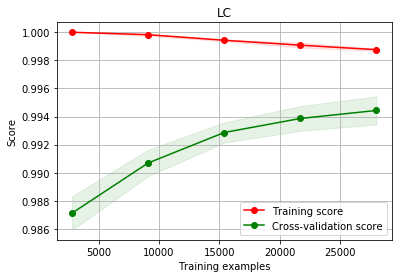

In [21]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure()
    plt.title('LC')
    
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, features, labels, cv=5, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig('learning_curve.png', bbox_inches='tight')
    plt.show()


In [12]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

pipeline.fit(features, labels)
plot_importance(pipeline.named_steps['xgb'])
plt.show()

/home/dkovac/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dkovac/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
